In [1]:
#We'll be answering the following questions along the way:

#1.) What was the change in price of the stock over time?
#2.) What was the daily return of the stock on average?
#3.) What was the moving average of the various stocks?
#4.) What was the correlation between different stocks' closing prices?
#4.) What was the correlation between different stocks' daily returns?
#5.) How much value do we put at risk by investing in a particular stock?
#6.) How can we attempt to predict future stock behavior?

In [2]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# For reading stock data from yahoo
from pandas_datareader import data

# For time stamps
from datetime import datetime

# For division
from __future__ import division

In [3]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL','GOOG','MSFT','AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)


In [4]:
#For loop for grabing yahoo finance data and setting as a dataframe

for stock in tech_list:   
    
    # Set DataFrame as the Stock Ticker
    globals()[stock] = data.DataReader(stock,'yahoo',start,end)

In [5]:
# General Info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2021-06-28 to 2022-06-27
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       252 non-null    float64
 1   Low        252 non-null    float64
 2   Open       252 non-null    float64
 3   Close      252 non-null    float64
 4   Volume     252 non-null    float64
 5   Adj Close  252 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


In [6]:
# Summary Stats
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,157.895834,154.233234,155.974941,156.137659,8.962034e+07,155.715672
std,12.925945,12.509301,12.794171,12.708300,2.678550e+07,12.743795
min,132.389999,129.039993,130.070007,130.059998,4.100000e+07,130.059998
25%,147.769997,145.232498,146.197498,146.147495,7.057432e+07,145.553795
50%,154.675003,150.510002,152.235001,152.284996,8.626995e+07,151.900696
75%,169.727493,165.512501,167.607498,166.727497,1.045706e+08,166.482895
max,182.940002,179.119995,182.630005,182.009995,1.954327e+08,181.511703


<AxesSubplot:xlabel='Date'>

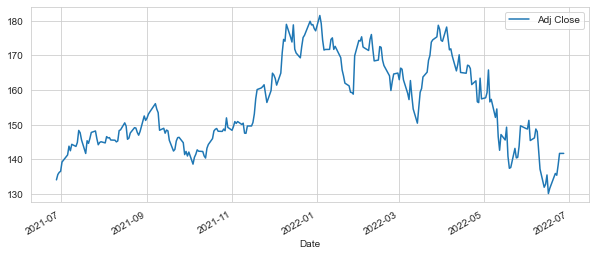

In [7]:
# a historical view of the closing price
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

<AxesSubplot:xlabel='Date'>

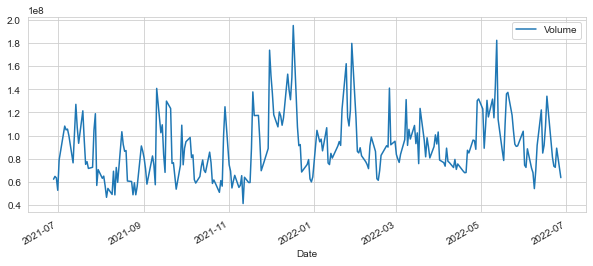

In [8]:
#plot the total volume of stock being traded each day over the year
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [9]:
# Let's go ahead and plot out several moving averages
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma)) #Creating a column name with Moving average
    AAPL[column_name]=AAPL['Adj Close'].rolling(ma).mean() #Adding MA column in AAPL

<AxesSubplot:xlabel='Date'>

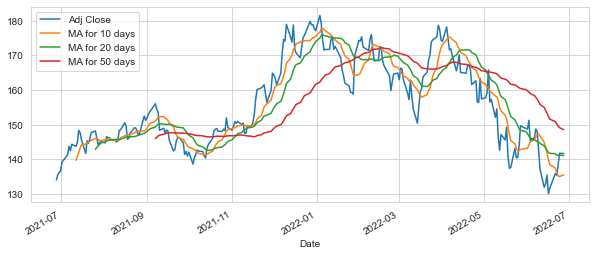

In [10]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

In [11]:
#Section 2 - Daily Return Analysis

<AxesSubplot:xlabel='Date'>

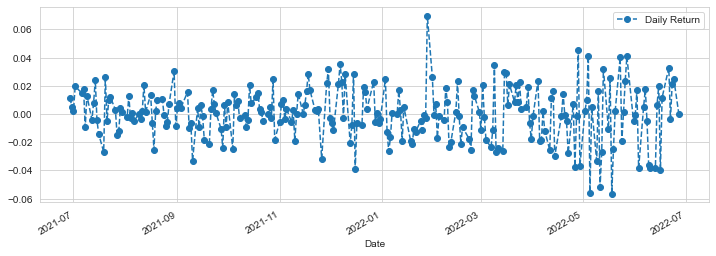

In [12]:
# We'll use pct_change to find the percent change for each day
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

#plot the daily return percentage
AAPL['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

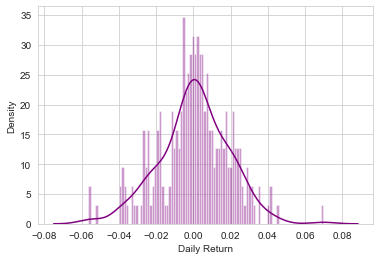

In [13]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [14]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = data.DataReader(['AAPL','GOOG','MSFT','AMZN'],'yahoo',start,end)['Adj Close']

In [15]:
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-06-28,134.014359,2536.389893,266.543488,172.194504
2021-06-29,135.555527,2520.370117,269.201843,172.406998
2021-06-30,136.181976,2506.320068,268.705872,172.007996
2021-07-01,136.490189,2527.370117,269.400208,171.648499
2021-07-02,139.164917,2574.379883,275.401215,175.548996


In [16]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()

In [17]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-06-28,NaN,NaN,NaN,NaN
2021-06-29,0.011500,-0.006316,0.009973,0.001234
2021-06-30,0.004621,-0.005575,-0.001842,-0.002314
2021-07-01,0.002263,0.008399,0.002584,-0.002090
2021-07-02,0.019596,0.018600,0.022275,0.022724


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


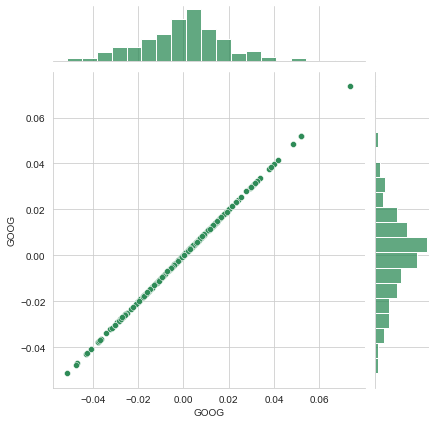

In [18]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


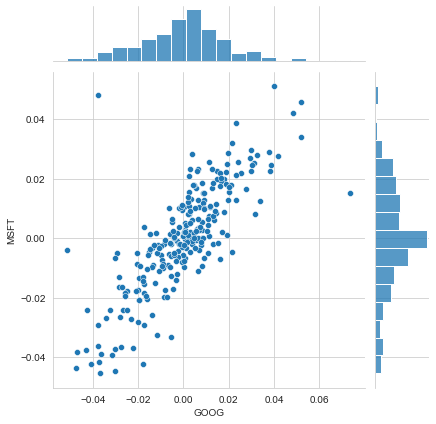

In [19]:
# use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter')

In [20]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-06-28,NaN,NaN,NaN,NaN
2021-06-29,0.011500,-0.006316,0.009973,0.001234
2021-06-30,0.004621,-0.005575,-0.001842,-0.002314
2021-07-01,0.002263,0.008399,0.002584,-0.002090
2021-07-02,0.019596,0.018600,0.022275,0.022724


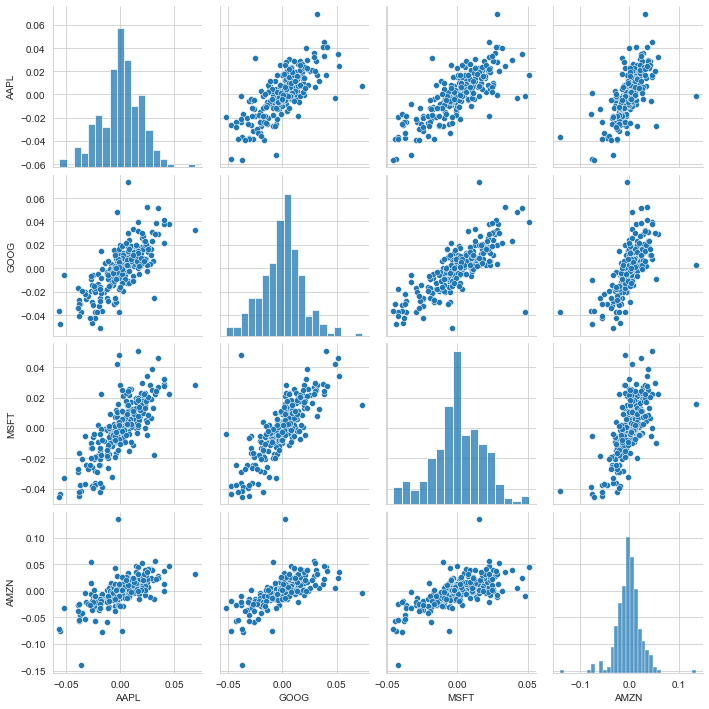

In [21]:
# simply call pairplot on DataFrame for an automatic visual analysis of all the comparisons
sns.pairplot(tech_rets.dropna())

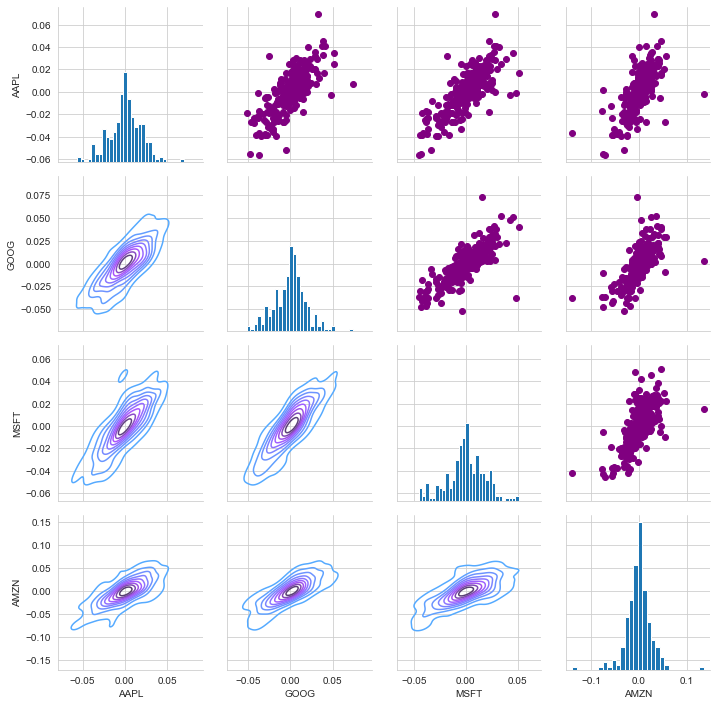

In [22]:
# Set up figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper I can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# I can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

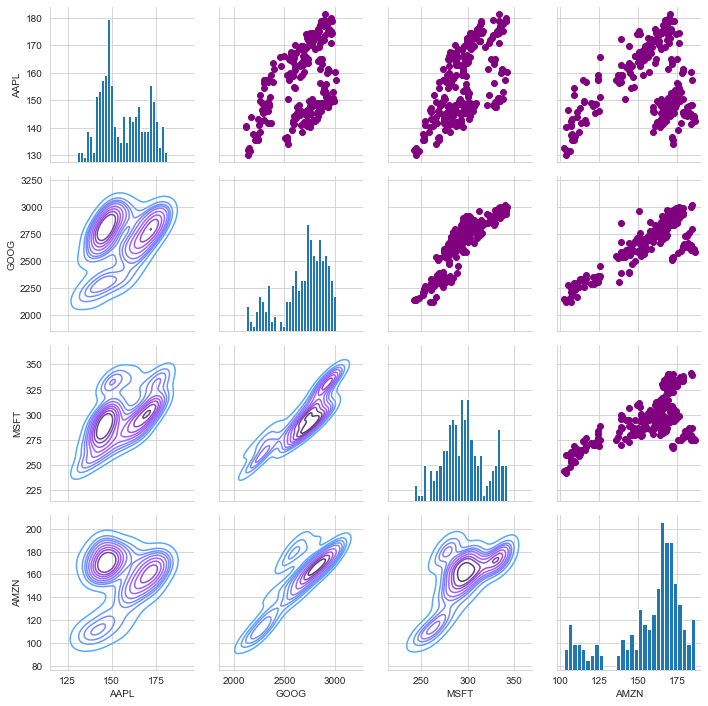

In [23]:
# Doing the same for close price 

returns_fig = sns.PairGrid(closing_df.dropna())


returns_fig.map_upper(plt.scatter,color='purple')


returns_fig.map_lower(sns.kdeplot,cmap='cool_d')


returns_fig.map_diag(plt.hist,bins=30)

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

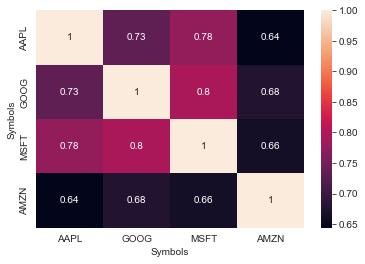

In [24]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(tech_rets.corr(), annot=True)

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

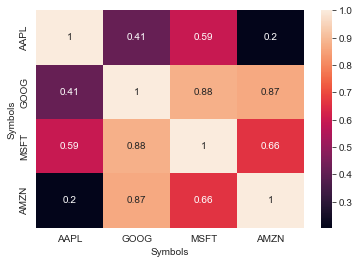

In [25]:
# For closing return
sns.heatmap(closing_df.corr(), annot=True)

In [26]:
#Section 3- Risk analysis

In [27]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()


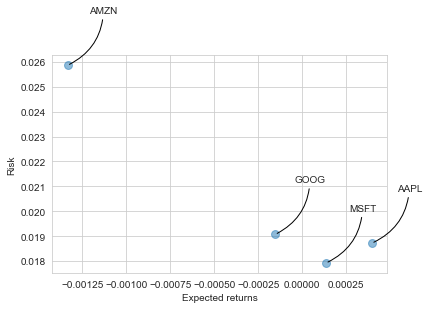

In [28]:
area = np.pi*20
plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()): # For every column in rets dataframe, set x = mean, set y= std
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-',color ='black', connectionstyle = 'arc3,rad=-0.3'))

In [29]:
# You want stock has positive Expected Return with lower risk (Apple is good to pick here)
# You don't want negative Expected Return with higher Risk (Amazon)

In [30]:
#Section 4 - Value at risk

In [31]:
# We can treat value at risk as the amount of money we could expect to lose (aka putting at risk) for a given confidence interval. 
# Theres several methods we can use for estimating a value at risk.



In [32]:
# Bootstap method

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

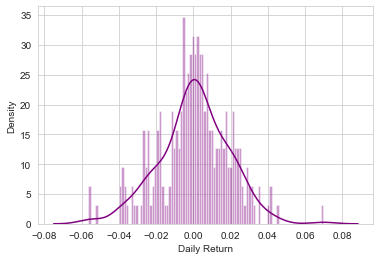

In [33]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [34]:
rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-06-29,0.011500,-0.006316,0.009973,0.001234
2021-06-30,0.004621,-0.005575,-0.001842,-0.002314
2021-07-01,0.002263,0.008399,0.002584,-0.002090
2021-07-02,0.019596,0.018600,0.022275,0.022724
2021-07-06,0.014718,0.008173,0.000036,0.046927


In [35]:
# The 0.05 empirical quantile of daily returns
rets['AAPL'].quantile(0.05)

-0.03239016047726068

In [36]:
# The 0.05 empirical quantile of daily returns is at -0.030. That means that with 95% confidence, our worst daily loss will not exceed 3%. 
# If we have a 1 million dollar investment, our one-day 5% VaR is 0.030 * 1,000,000 = $30,000.

In [37]:
rets['GOOG'].quantile(0.05)

-0.03313981865008758

In [38]:
rets['MSFT'].quantile(0.05)

-0.036404672880166966

In [39]:
rets['AMZN'].quantile(0.05)

-0.037134903142395204

In [40]:
# Monte Carlo method


In [41]:
# Monte Carlo for Google
# Set up time horizon
days = 365

# Now delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data 
mu = rets.mean()['GOOG']

# Now let's grab the volatility of the stock from the std() of the average return
sigma = rets.std()['GOOG']

In [42]:
''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
def stock_monte_carlo(start_price,days,mu,sigma):
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
    return price

In [43]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-06-28,2546.739990,2519.476074,2540.000000,2536.389893,1405500,2536.389893
2021-06-29,2540.000000,2508.739990,2535.449951,2520.370117,1047500,2520.370117
2021-06-30,2516.000000,2495.149902,2513.071045,2506.320068,1200300,2506.320068
2021-07-01,2529.250000,2496.995117,2496.995117,2527.370117,856000,2527.370117
2021-07-02,2576.959961,2535.379883,2536.790039,2574.379883,1058000,2574.379883


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

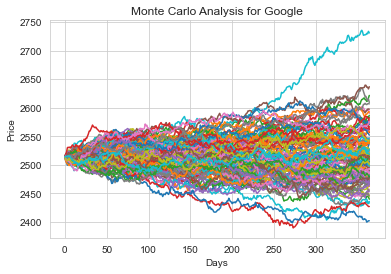

In [44]:
start_price = 2513.38

# Run Monte Carlo function for 100 times 

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')

In [45]:
# Create a histogram for larger run 

In [46]:
# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)


for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

In [47]:
#Now that we have our array of simulations, we can go ahead and plot a histogram ,as well as use qunatile to define our risk for this stock.

Text(0.5, 1.0, 'Final price distribution for Google Stock after 365 days')

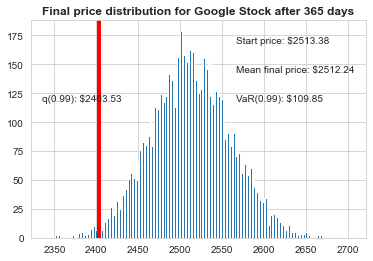

In [48]:
# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)

# Plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)

# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title("Final price distribution for Google Stock after %s days" % days, weight='bold')

In [49]:
# You will put $108.68 at risk for every investment of $2513.38. 
# Mean 99% of the time over the year, you will lose the most is $108.68

In [50]:
# Monte Carlo for Apple
# Set up time horizon
days = 365

# Now delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data 
mu = rets.mean()['AAPL']

# Now let's grab the volatility of the stock from the std() of the average return
sigma = rets.std()['AAPL']

In [51]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,
2021-06-28,135.250000,133.350006,133.410004,134.779999,62111300.0,134.014328,NaN,NaN,NaN,NaN
2021-06-29,136.490005,134.350006,134.800003,136.330002,64556100.0,135.555542,NaN,NaN,NaN,0.011500
2021-06-30,137.410004,135.869995,136.169998,136.960007,63261400.0,136.181961,NaN,NaN,NaN,0.004621
2021-07-01,137.330002,135.759995,136.600006,137.270004,52485800.0,136.490204,NaN,NaN,NaN,0.002263
2021-07-02,140.000000,137.750000,137.899994,139.960007,78852600.0,139.164932,NaN,NaN,NaN,0.019596


In [52]:
start_price = 127.82

In [53]:

runs = 10000


simulations = np.zeros(runs)


for run in range(runs):    
    
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for Apple Stock after 365 days')

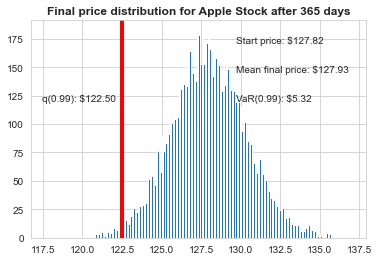

In [54]:

q = np.percentile(simulations, 1)


plt.hist(simulations,bins=200)


plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)


plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())


plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))


plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)


plt.axvline(x=q, linewidth=4, color='r')


plt.title("Final price distribution for Apple Stock after %s days" % days, weight='bold')

In [55]:
# You will put $7.57 at risk for every investment of $127.82 
# Mean 99% of the time over the year, you will lose the most is $7.57

In [56]:
# Monte Carlo for Amazon

In [57]:

days = 365


dt = 1/days


mu = rets.mean()['AMZN']


sigma = rets.std()['AMZN']

In [58]:
AMZN.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-06-28,172.399994,170.675507,170.800003,172.194504,44856000.0,172.194504
2021-06-29,172.801498,171.151505,171.940994,172.406998,41968000.0,172.406998
2021-06-30,173.580002,171.750000,172.052994,172.007996,48080000.0,172.007996
2021-07-01,172.850006,170.470993,171.730499,171.648499,40742000.0,171.648499
2021-07-02,175.585999,171.845993,172.582001,175.548996,63388000.0,175.548996


In [59]:
start_price = 167.34

In [60]:
runs = 10000


simulations = np.zeros(runs)


for run in range(runs):    
    
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for Amazon Stock after 365 days')

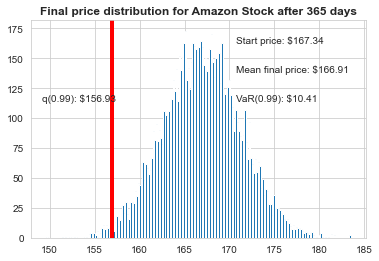

In [61]:
q = np.percentile(simulations, 1)


plt.hist(simulations,bins=200)


plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)


plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())


plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))


plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)


plt.axvline(x=q, linewidth=4, color='r')


plt.title("Final price distribution for Amazon Stock after %s days" % days, weight='bold')

In [62]:
# You will put $9.90 at risk for every investment of $167.34
# Mean 99% of the time over the year, you will lose the most is $10.22